In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

In [4]:
data = pd.read_csv("Desktop/Customer/Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
cols=data.columns
for col in cols:
    print(data[col].value_counts(),"\n")

CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64 

Gender
Female    112
Male       88
Name: count, dtype: int64 

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64 

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64 

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Le

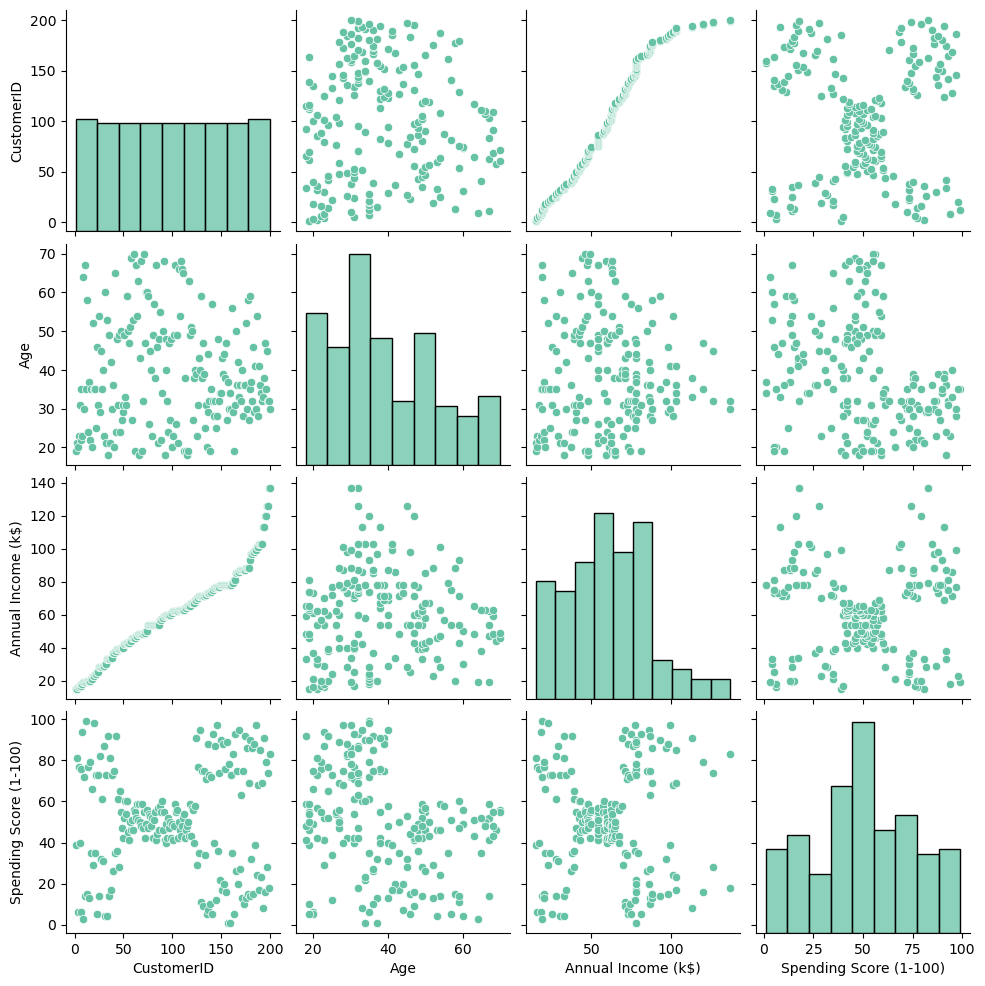

In [11]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
sns.pairplot(data)

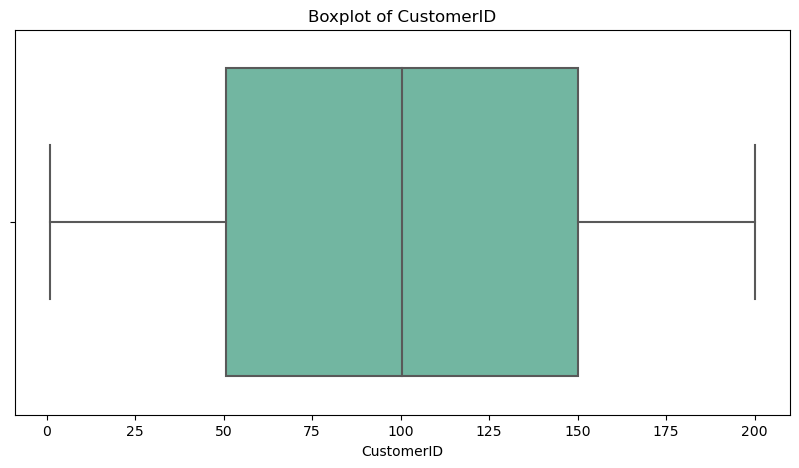

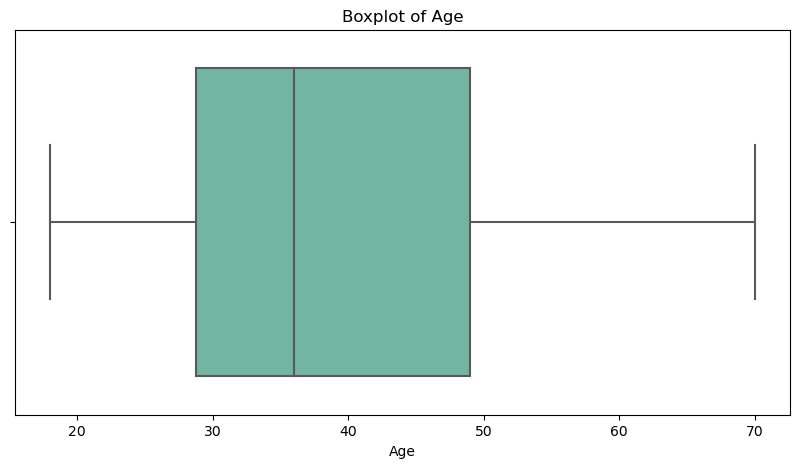

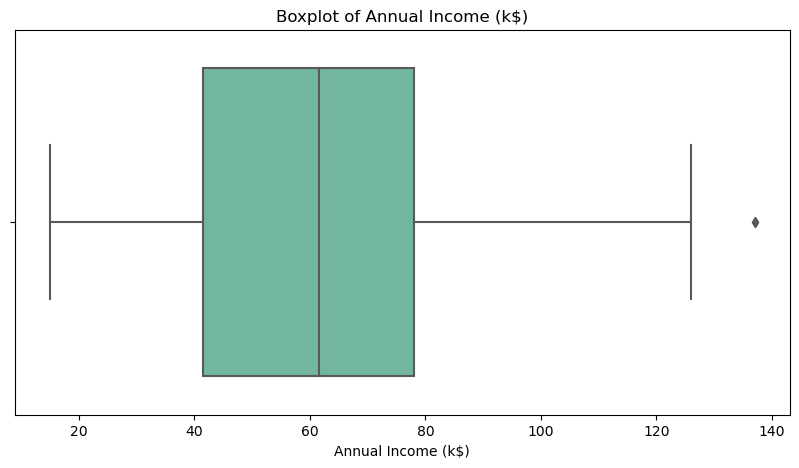

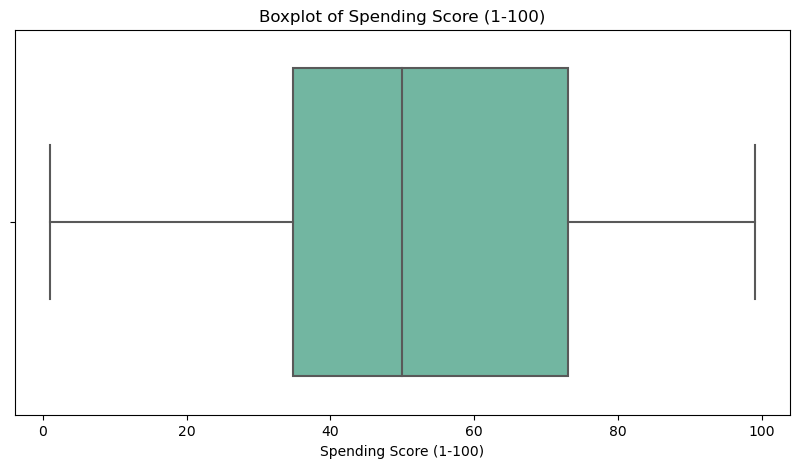

In [12]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f'Boxplot of {col}')
    bp = sns.boxplot(data=data, x=col, ax=ax)
    plt.show()
    plt.close(fig)

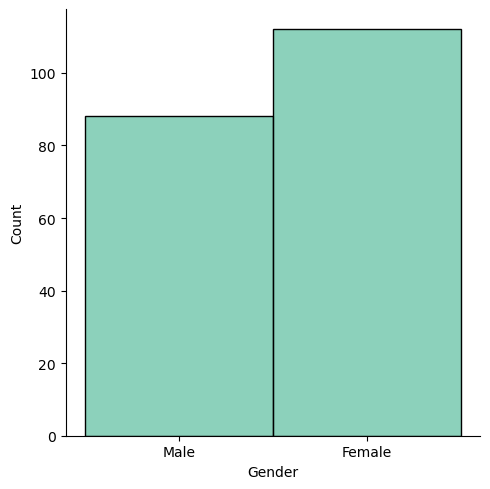

In [13]:
custom_palette = "Set2"  
sns.set_palette(custom_palette)
sns.displot(data=data, x="Gender")

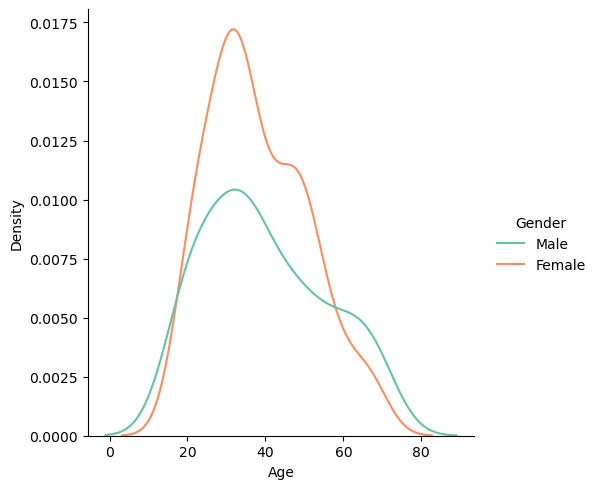

In [14]:
sns.displot(data, x = 'Age',hue='Gender', kind='kde')

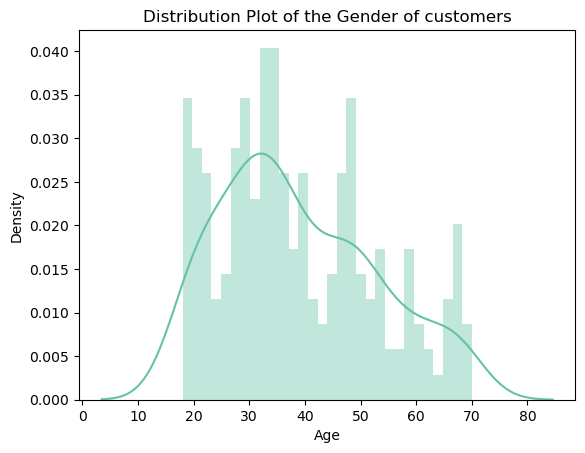

In [15]:
sns.set_palette("Set2")  
sns.distplot(data['Age'], kde=True, bins=30)
plt.title('Distribution Plot of the Gender of customers')
plt.show()

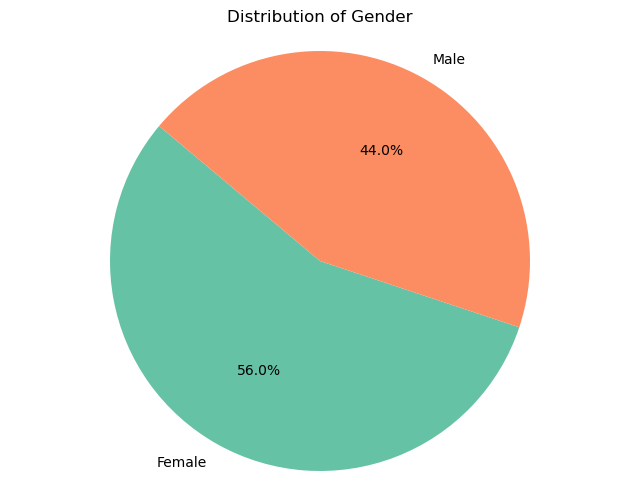

In [16]:

custom_palette = "Set2"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette()
                                   , startangle=140)
plt.title("Distribution of Gender")
plt.ylabel("")
plt.axis('equal')
plt.show()

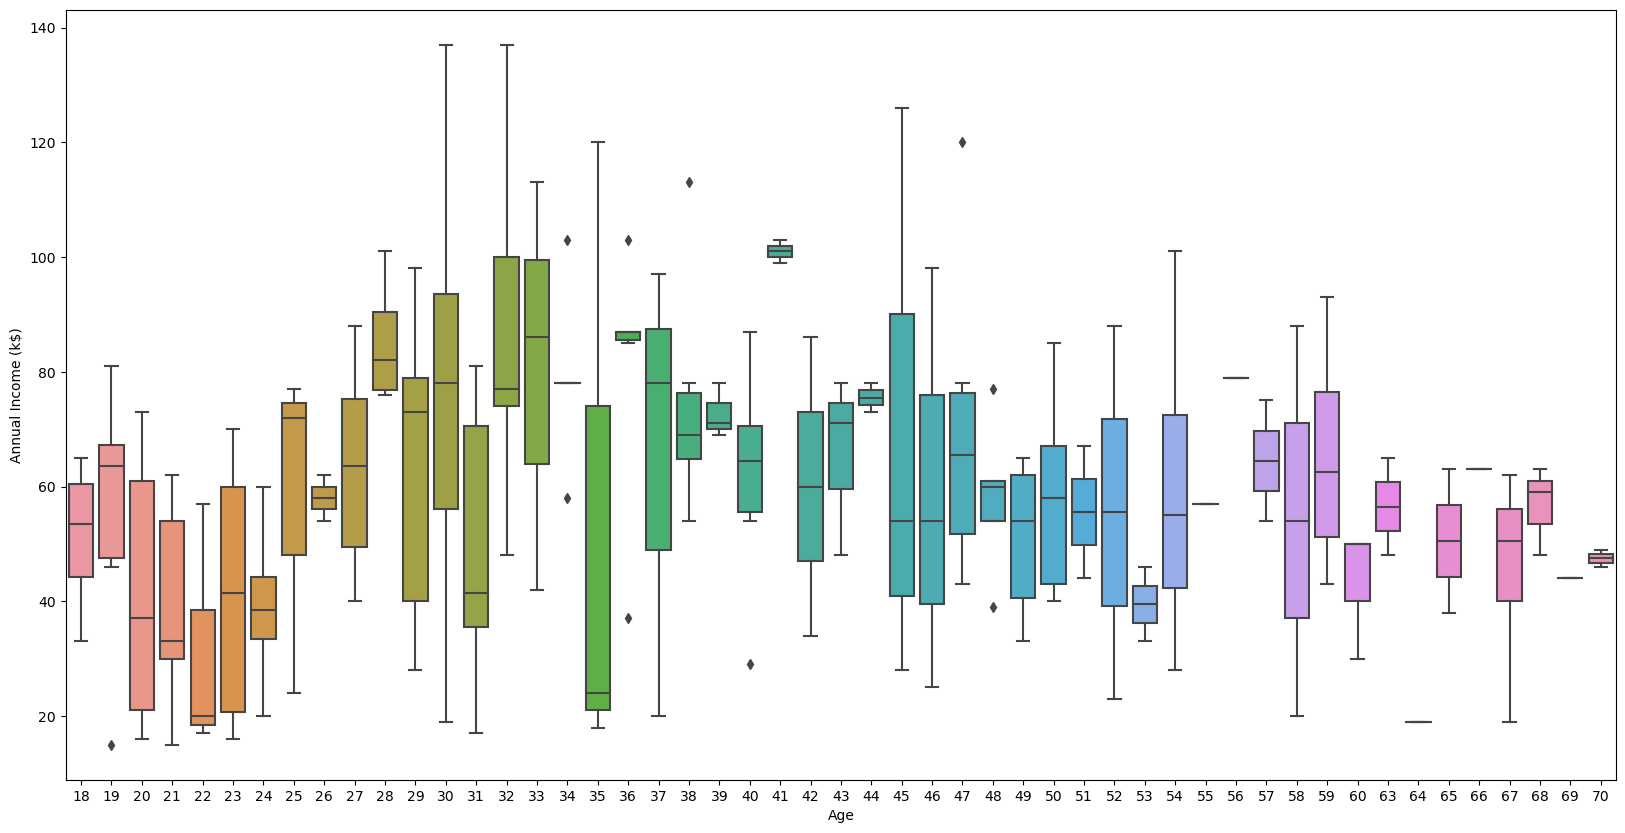

In [17]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="Age", y="Annual Income (k$)")
plt.show()

In [18]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64